In [2]:
import pandas as pd

In [3]:
X_train = pd.read_csv('./dog_adopt_preprocessing_X_train.csv')
X_test = pd.read_csv('./dog_adopt_preprocessing_X_test.csv')
y_train = pd.read_csv('./dog_adopt_preprocessing_y_train.csv')
y_test = pd.read_csv('./dog_adopt_preprocessing_y_test.csv')

In [4]:
from lazypredict.Supervised import LazyClassifier
model = LazyClassifier(verbose=0, ignore_warnings=False, predictions=True)
models, predictions = model.fit(X_train, X_test, y_train, y_test)
print(models)

 29%|██▉       | 9/31 [00:00<00:00, 29.28it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
FixedThresholdClassifier model failed to execute
FixedThresholdClassifier.__init__() missing 1 required positional argument: 'estimator'


 97%|█████████▋| 30/31 [00:01<00:00, 23.17it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
TunedThresholdClassifierCV model failed to execute
TunedThresholdClassifierCV.__init__() missing 1 required positional argument: 'estimator'


100%|██████████| 31/31 [00:01<00:00, 22.44it/s]

[LightGBM] [Info] Number of positive: 984, number of negative: 984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 527
[LightGBM] [Info] Number of data points in the train set: 1968, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.78               0.76     0.76      0.78   
RandomForestClassifier             0.76               0.74     0.74      0.76   
BaggingClassifier                  0.76               0.74     0.74      0.76   
XGBClassifier                      0.76               0.73     0.73      0.76   
QuadraticDiscrimin

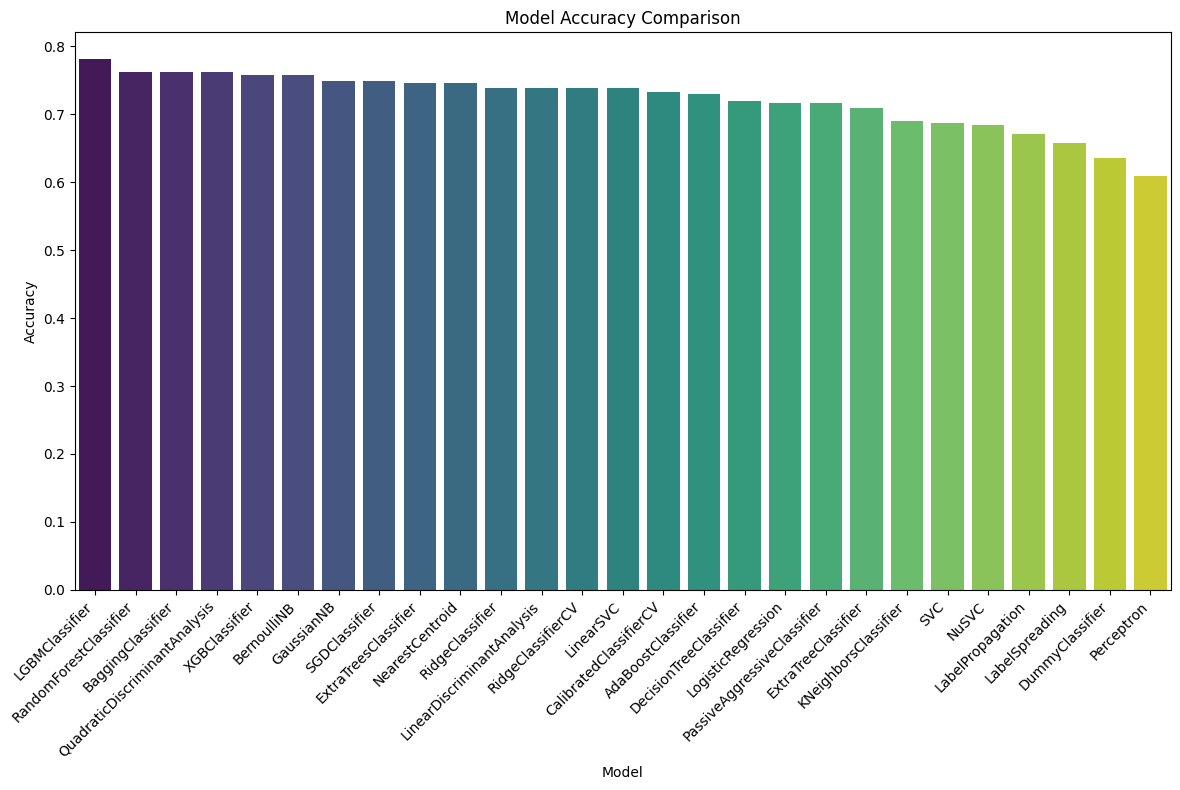

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
models_sorted = models.sort_values(by="Accuracy", ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=models_sorted.index, y=models_sorted['Accuracy'], palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.tight_layout()
plt.show()

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, roc_auc_score, recall_score
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
     

In [7]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=30000, learning_rate=0.000001,tree_method='gpu_hist',predictor='gpu_predictor')
xgb_model = model.fit(X_train, y_train, early_stopping_rounds = 20, eval_metric='logloss', eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)
     

[0]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[1]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[2]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[3]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[4]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[5]	validation_0-logloss:0.69314	validation_1-logloss:0.69315
[6]	validation_0-logloss:0.69314	validation_1-logloss:0.69315
[7]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[8]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[9]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[10]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[11]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[12]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[13]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[14]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[15]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[1

In [8]:
x_pred = xgb_model.predict(X_test)
x_pred_proba = xgb_model.predict_proba(X_test)[:,1]

In [9]:
get_clf_eval(y_test,x_pred,x_pred_proba)

정확도: 0.7278, 정밀도 : 0.6328, 재현율 : 0.6000, F1:0.6160, AUC:0.7804


In [10]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

results = xgb_model.evals_result()
print(results)

{'validation_0': OrderedDict({'logloss': [0.6931467999408885, 0.693146442918758, 0.6931460782037517, 0.6931457073707891, 0.6931453425346351, 0.6931449807271725, 0.6931446081375688, 0.6931442399092806, 0.6931438731347642, 0.6931435122964827, 0.6931431473391813, 0.6931427753553158, 0.693142409428833, 0.6931420382930011, 0.6931416672783169, 0.6931413195845557, 0.6931409360310896, 0.6931405768888753, 0.693140212537312, 0.6931398354046713, 0.6931394925568162, 0.6931390961011251, 0.6931387441671961, 0.6931383843586697, 0.6931379923854417, 0.6931376431167611, 0.693137264409201, 0.6931369049035436, 0.693136549698628, 0.6931361665691786, 0.6931358083961455, 0.6931354492539312, 0.6931350699406329, 0.6931347077091535, 0.6931343405106203, 0.6931339665883924, 0.6931335980572352, 0.6931332414591216, 0.6931328703838635, 0.693132499490327, 0.6931321369559784, 0.6931317782983547, 0.6931314048607174, 0.6931310342700501, 0.6931306648302854, 0.6931302995095409, 0.6931299453949541, 0.6931295641432933, 0.69

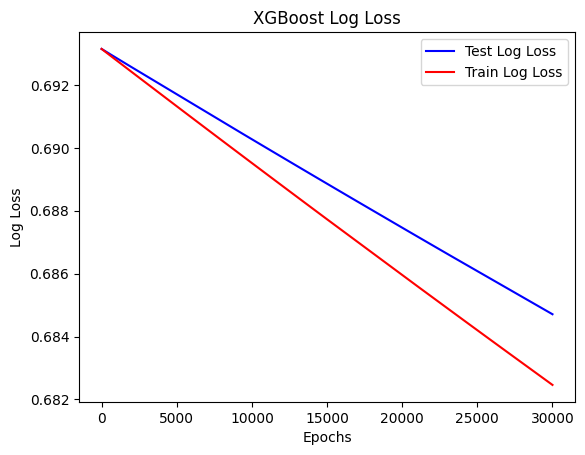

In [11]:

import matplotlib.pyplot as plt
from xgboost import plot_importance

results = xgb_model.evals_result()

epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_1']['logloss'], label='Test Log Loss', color = 'b')
ax.plot(x_axis, results['validation_0']['logloss'], label='Train Log Loss', color = 'r')
ax.legend()
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

In [23]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(n_estimators=2000, learning_rate=0.001)
evals = [(X_train, y_train), (X_test, y_test)]
lgbm_model.fit(X_train, y_train, eval_metric='logloss', eval_set= evals)

[LightGBM] [Info] Number of positive: 984, number of negative: 984
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000532 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1968, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(learning_rate=0.001, n_estimators=2000)

In [24]:
preds = lgbm_model.predict(X_test)
x_pred_proba = lgbm_model.predict_proba(X_test)[:,1]

In [25]:
get_clf_eval(y_test,preds,x_pred_proba)

정확도: 0.7385, 정밀도 : 0.6377, 재현율 : 0.6519, F1:0.6447, AUC:0.8224


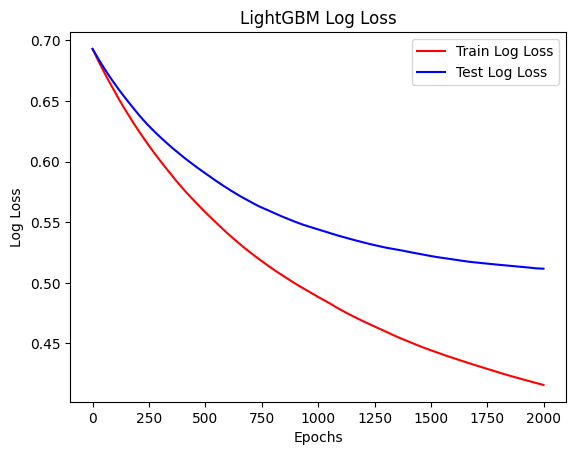

In [26]:

import matplotlib.pyplot as plt
from lightgbm import plot_importance

results = lgbm_model.evals_result_

train_key = list(results.keys())[0]
test_key = list(results.keys())[1]

epochs = len(results[train_key]['binary_logloss'])
x_axis = range(epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results[train_key]['binary_logloss'], label='Train Log Loss', color='r')
ax.plot(x_axis, results[test_key]['binary_logloss'], label='Test Log Loss', color='b')
ax.legend()
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('LightGBM Log Loss')
plt.show()

In [ ]:
import pickle
file_path = './model/dog_adopt_classifier.model'
pickle.dump(models, open(file_path, 'wb'))